In [1]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from PIL import Image

In [2]:
input_label = []
output_label = []
label = []

In [ ]:
ficheiro = open("..\\..\\Dataset\\21-02-2018(Time).csv", "r")

ficheiro.readline()
ficheiro.readline()
ficheiro.readline()

countLinha = 0
linha = ficheiro.readline()
while(linha != ""):
    linha = linha.split(",")
    linha.append(datetime.strptime(linha.pop(len(linha) - 1) + "", '%d/%m/%Y %H:%M:%S\n\n').time())
    label.append(linha)
    countLinha += 1
    linha = ficheiro.readline()
ficheiro.close()

In [ ]:
label.sort(key = lambda array : array[len(array) - 1])

In [ ]:
for i in range(len(label)):
    label[i].pop(len(label[i]) - 1)

In [ ]:
b = 0
a = 0
for i in range(len(label)):
    out = label[i].pop(len(label[i]) - 1)
    if(out == "Benign"):
        out = 0
        b += 1
    else:
        out = 1
        a += 1
    output_label.append(out)
    input_label.append(label[i])

In [ ]:
print(str(a) + " " + str(b))

In [10]:
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(input_label)
input_label = scaler.transform(input_label)

In [9]:
inp_train = input_label[:int(len(input_label) * 0.8)]
inp_test = input_label[int(len(input_label) * 0.8):]
out_train = output_label[0:int(len(output_label) * 0.8)]
out_test = output_label[int(len(output_label) * 0.8):]
print(len(input_label))
print(len(inp_train))
print(len(inp_test))

1048574
838859
209715


In [16]:
inp_train, inp_test, out_train, out_test = train_test_split(input_label, output_label, test_size = 0.2, shuffle = False)

In [15]:
model = keras.Sequential([
    layers.LSTM(units = 32, input_shape = (78, 1), return_sequences = True, use_bias = True),
    layers.LSTM(units = 16, return_sequences = True, use_bias = True),
    layers.LSTM(units = 6, return_sequences = False, use_bias = True),
    layers.Dense(units = 2, activation = "softmax")
])

In [17]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate = 0.0001), loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [20]:
train = model.fit(x = inp_train, y = out_train, validation_split = 0.1, validation_data=(inp_test, out_test), epochs= 5, verbose = 1)

Epoch 1/2
23593/23593 [==============================] - 1295s 55ms/step - loss: 0.0822 - accuracy: 0.9688 - val_loss: 7.0689e-04 - val_accuracy: 0.9999
Epoch 2/2
23593/23593 [==============================] - 1287s 55ms/step - loss: 9.0664e-04 - accuracy: 0.9999 - val_loss: 6.4058e-04 - val_accuracy: 0.9999


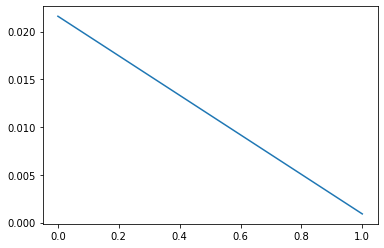

In [22]:
plt.plot(train.history["loss"])
plt.show()

In [23]:
model.save("DDosNet.h5")

In [24]:
res = [np.argmax(resu) for resu in model.predict(inp_test)]

In [26]:
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [27]:
cm = confusion_matrix(y_true = out_test.reshape(len(out_test)), y_pred = np.array(res))

In [28]:
def plot_confusion_matrix(cm, classes, normaliza = False, title = "Confusion matrix", cmap = plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normaliza:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")
    
    print(cm)
    
    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
        horizontalalignment="center",
        color="white" if cm[i,j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[104779    291]
 [  1710 102935]]


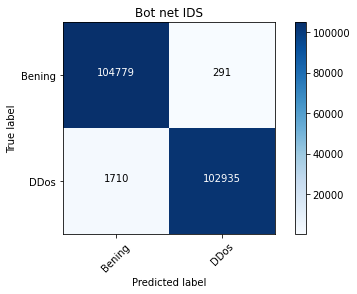

In [29]:
labels = ["Bening", "DDos"]
plot_confusion_matrix(cm = cm, classes = labels, title = "Bot net IDS")